## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,DAYS_EMPLOYED_ANOM
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,1,0,1,0,False
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,1,0,False
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,False
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,False
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,False


C:\Users\TL_Yu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


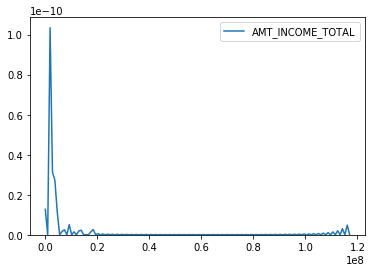

In [5]:
sns.kdeplot(data=app_train['AMT_INCOME_TOTAL'])

In [6]:
# 從以上分析可以看到這個欄位有少部分極端值，不適合採用等寬分組，在此採用等頻分組，以消除極端值的影響
app_train.loc[:,"nAMT_INCOME_TOTAL"] = pd.qcut(app_train['AMT_INCOME_TOTAL'], 10)
app_train['nAMT_INCOME_TOTAL'].value_counts()

(112500.0, 135000.0]       48849
(180000.0, 225000.0]       44809
(99000.0, 112500.0]        36907
(25649.999, 81000.0]       33391
(147150.0, 162000.0]       31120
(162000.0, 180000.0]       30704
(81000.0, 99000.0]         30280
(270000.0, 117000000.0]    27161
(225000.0, 270000.0]       19957
(135000.0, 147150.0]        4333
Name: nAMT_INCOME_TOTAL, dtype: int64

In [13]:
TB = app_train[['AMT_INCOME_TOTAL','nAMT_INCOME_TOTAL']].groupby('nAMT_INCOME_TOTAL').agg(['min', 'max','mean',"count"])
TB

AMT_INCOME_TOTAL                                   
                                     min          max           mean  count
nAMT_INCOME_TOTAL                                                          
(25649.999, 81000.0]             25650.0      81000.0   66254.124685  33391
(81000.0, 99000.0]               81180.0      99000.0   91089.278813  30280
(99000.0, 112500.0]              99031.5     112500.0  111333.276330  36907
(112500.0, 135000.0]            112549.5     135000.0  131852.488657  48849
(135000.0, 147150.0]            135256.5     147150.0  142953.056026   4333
(147150.0, 162000.0]            147447.0     162000.0  157141.512098  31120
(162000.0, 180000.0]            162279.0     180000.0  178061.632269  30704
(180000.0, 225000.0]            180090.0     225000.0  212733.495347  44809
(225000.0, 270000.0]            225112.5     270000.0  259491.085277  19957
(270000.0, 117000000.0]         270013.5  117000000.0  393910.389377  27161

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

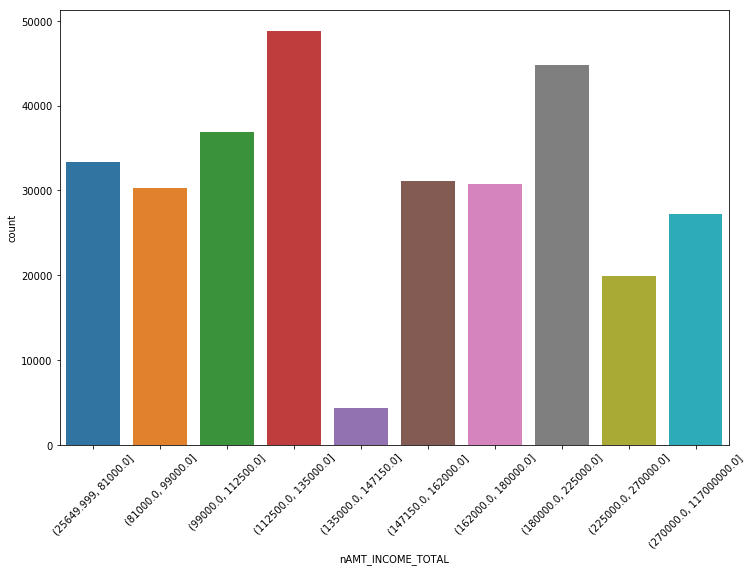

In [15]:
fig= plt.figure(figsize = (12,8))
sns.countplot(x=app_train['nAMT_INCOME_TOTAL'])
plt.xticks(rotation = 45)